In [1]:
import numpy as np
import pandas as pd

In [2]:
# Ignoring the Harmless Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the seasonal Data

airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.index.freq = 'MS'

In [4]:
# Importing the Non seasonal Data

fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
fem_birth.index.freq = 'D'

<AxesSubplot:xlabel='Month'>

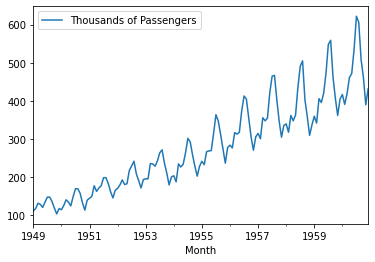

In [5]:
# Ploting the Non Stationary Data

airline.plot()

<AxesSubplot:xlabel='Date'>

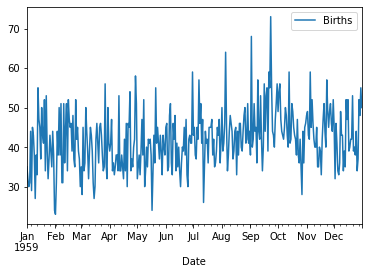

In [6]:
# Ploting the Stationary Data

fem_birth.plot()

<font color = red> <b> Dicky Fuller Test

In [7]:
# Import in adfuller from the stats model

from statsmodels.tsa.stattools import adfuller

In [8]:
# Runnning on Airline data

adfuller(airline['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
# Usning the help to see what paramenters are return by the adfuller test

help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

In [16]:
# Interpreting the adfuller test results

dftest = adfuller(airline['Thousands of Passengers'])

dfout = pd.Series(dftest[0:4], index=['ADF Test-Statistic', 'p-Value', '# of Lag Used', '# of Observation'])

In [17]:
adfuller(airline['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
dfout

ADF Test-Statistic      0.815369
p-Value                 0.991880
# of Lag Used          13.000000
# of Observation      130.000000
dtype: float64

In [25]:
dftest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [27]:
# Adding the critcal value to dfout

for key,val in dftest[4].items():
    dfout[f"Critical Value ({key})"] = val
    

In [32]:
# Ducky fuller test for The Airline Dataset
print('Augmented Dickey-Fuller Test on Airlines Passenger')
dfout

Augmented Dickey-Fuller Test on Airlines Passenger


ADF Test-Statistic        0.815369
p-Value                   0.991880
# of Lag Used            13.000000
# of Observation        130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64

In [31]:
# APplying the Dicky fuller test on Strationary Data Fem_birth

print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest1 = adfuller(fem_birth['Births'],autolag='AIC')
dfout1 = pd.Series(dftest1[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest1[4].items():
    dfout1[f'critical value ({key})']=val
print(dfout1)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In [11]:
# Creating A generalus function to Run a Dicky fuller test on any data set

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
#  Airline Data

adf_test(airline['Thousands of Passengers'], 'Airline Passenger Dataset' )

Augmented Dickey-Fuller Test: Airline Passenger Dataset
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
# Female birth Data

adf_test(fem_birth['Births'], "Daily Female Births Data Set")

Augmented Dickey-Fuller Test: Daily Female Births Data Set
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<font color = red> <b> Ggranger Causality Test

The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

In [37]:
# Importing the data set

sample = pd.read_csv("Data/samples.csv", index_col=0, parse_dates=True)
sample.index.freq = 'MS'

In [39]:
sample.head(10)

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
1950-06-01,55,16,19,60
1950-07-01,60,24,24,53
1950-08-01,54,16,33,71
1950-09-01,49,25,44,63
1950-10-01,65,27,60,46


<AxesSubplot:>

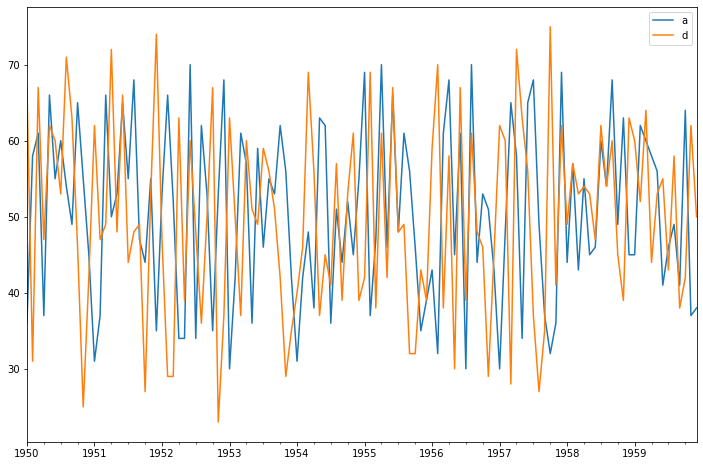

In [40]:
# Plotting the cpl a and d

sample[['a','d']].plot(figsize=[12,8])

<font color = blue> <b> Just by visualisation we can see if there is any causality between a and d

<AxesSubplot:>

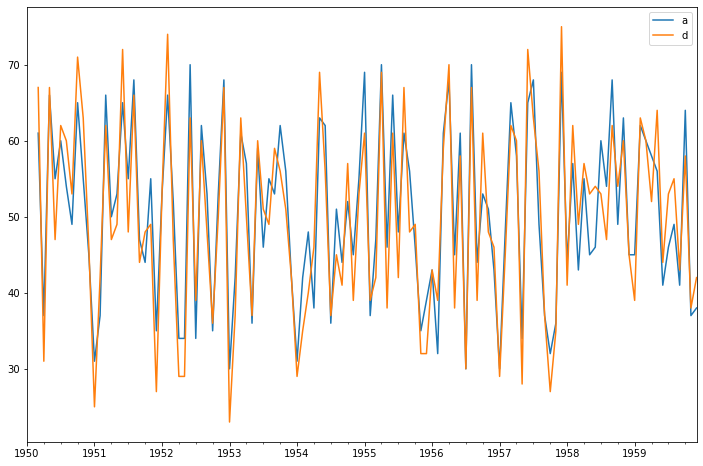

In [41]:
# Just by shiffting bot the columns we can see the causality

sample['a'].iloc[2:].plot(figsize=(12,8), legend = True)
sample['d'].shift(2).plot(legend= True)

<font color =blue> <b> Just by shifting both the column we can see the clear pattern on causality in a and d

<font color = green> <b> In normal situation it is very hard to predict the shift in the TS to find the causality. So we use Ganger-Causality Test for the Check.

In [42]:
from statsmodels.tsa.stattools import grangercausalitytests

In [46]:
grangercausalitytests(sample[['a','d']], maxlag=3 );  
# maxlags will take input as a maximum lags user wants to check for causality

# Will check for the p-value less than 0.05
# Below for lag 2 p value is less than 0.05, hence there causality between a and d


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [47]:
#checking the other dataset for causality
grangercausalitytests(sample[['b','d']], maxlag=3 );  

# for lag 2 and 3 p-vlaue is same ie greater than 0.05, hence there is no causality between b and d


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


<font color = red> <b> Evaluating the forcasting accuracy

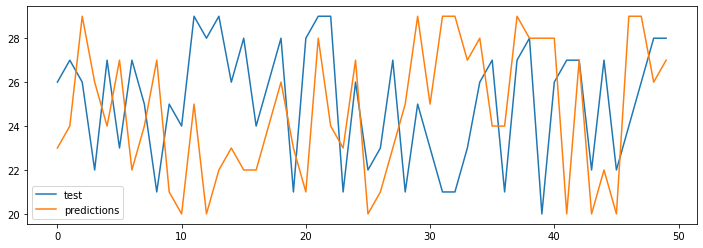

In [49]:
# Crearing a Random Data Set of test and prediction

np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.plot(figsize=(12,4));

In [50]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [51]:
mse(df['test'], df['predictions'])

17.02

In [52]:
meanabs(df['test'], df['predictions'])

3.54

In [53]:
rmse(df['test'], df['predictions'])

4.125530268947253

<font color = red> <b> Exposing Seasonality with Month and Quarter Plots

<AxesSubplot:xlabel='Month'>

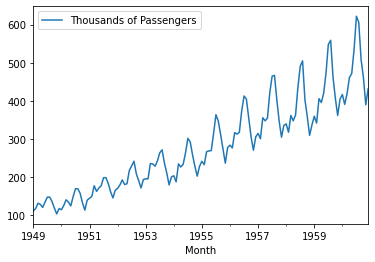

In [54]:
airline.plot()

In [55]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

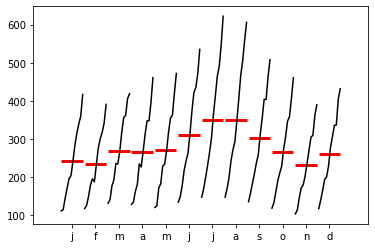

In [56]:
month_plot(airline['Thousands of Passengers']);

In [58]:
#Converting data into quaterly data
airline_q = airline['Thousands of Passengers'].resample(rule='Q').mean()
airline_q.head()

Month
1949-03-31    120.666667
1949-06-30    128.333333
1949-09-30    144.000000
1949-12-31    113.666667
1950-03-31    127.333333
Freq: Q-DEC, Name: Thousands of Passengers, dtype: float64

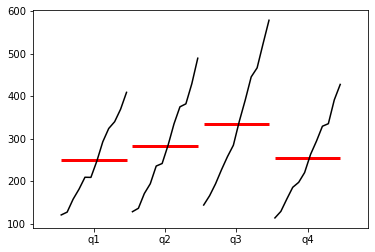

In [60]:
# Ploting the quater plot

quarter_plot(airline_q);